# Mapa logístico

In [0]:
import matplotlib.pyplot as plt
import numpy as np


defino la funcion de arriba:

```
def mapa(x0, R, n=20, plot = True):

    x = np.zeros(100)
    x[0] = x0

    for i in range(0, 100 - 1):
        x[i + 1] = R * x[i] * (1 - x[i])

    if plot : miplot(x[0:(n+1)],R)

    return x
```



In [0]:
def mapa(x0, R, n=20, plot = True):

    x = np.zeros(100)
    x[0] = x0

    for i in range(0, 100 - 1):
        x[i + 1] = R * x[i] * (1 - x[i])

    if plot : miplot(x[0:(n+1)],R)

    return x

definimos un grafico

```
def miplot(vec, R):
    plt.plot(vec,'-', linewidth=0.8, color='#340B8C')
    plt.ylim(0,1)
    plt.xlim(0, vec.__len__()-1)
    plt.ylabel('x(t)')
    plt.xlabel('t')
    # plt.grid(True)
    # plt.title(tit)
    plt.title('R = %1.2f' %R)

    plt.show()

```



In [0]:
def miplot(vec, R):
    plt.plot(vec,'-', linewidth=0.8, color='#340B8C')
    plt.ylim(0,1)
    plt.xlim(0, vec.__len__()-1)
    plt.ylabel('x(t)')
    plt.xlabel('t')
    # plt.grid(True)
    # plt.title(tit)
    plt.title('R = %1.2f' %R)

    plt.show()



Ejemplos de mapas:


```
mapa(x0=0.2 , R=2, n=5)
mapa(x0=0.99, R=2)
mapa(x0=0.2,  R=3.1)
mapa(x0=0.2,  R=3.49)
```


```

```


Aca vemos como un pequeño cambio en las condiciones iniciales cambian completamente el mapa:


```
mapa(R=4   , x0=0.2, n=50)
mapa(R=4   , x0=0.20000001, n=50)
```




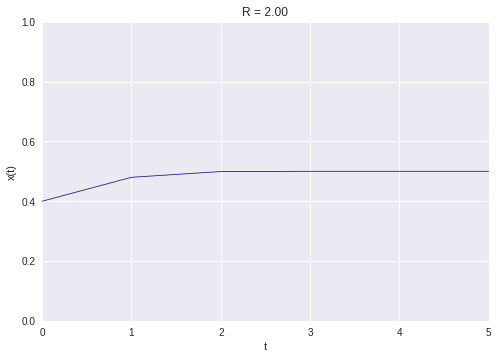

array([0.4       , 0.48      , 0.4992    , 0.49999872, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5    

In [9]:
mapa(x0=0.4 , R=2, n=5)
